# Autoencoders

Autoencoders are an unsupervised learning architectures in neural networks. Theys are commonly used in Deep Learning tasks; such as generative models, anomaly detection, dimensionality reduction. In this lecture, we will evaluate theoretical approaches of Autoencoders and see it's extensions. Autoencoders are an unsupervised learning method. They map the input data into lower dimensional space with encoder $E$, and then maps into same space that have same dimension of input data with decoder $D$.

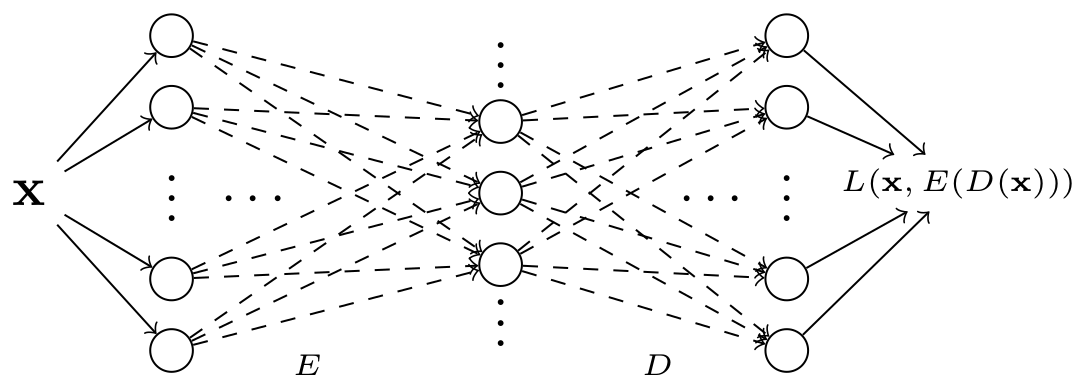

In [3]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(filename= "./img/ae1.png",width=600, height=600)

The main idea behind Autoencoders is to attempt to copy its input to its output. The input layer is fed with input vector $\mathbf{x}$ and the loss is calculated at output layer between $\mathbf{x}$ and $E(D(\mathbf{x}))$, in other words the loss is $L(\mathbf{x},E(D(\mathbf{x})))$. It measures difference between our original input and the consequent reconstruction.  We named the middle layer, that is connection between encoder $E$ and decoder $D$, as the "bottleneck". We can denote our output of bottleneck as $\mathbf{h} = E(\mathbf{x})$ and denote our output as $\mathbf{\hat{x}} = D(\mathbf{h}) = D(E(\mathbf{x}))$. We can define our encoder and decoder as conditional probability density function that are $p_{encoder}(\mathbf{h} | \mathbf{x})$ and $p_{decoder}(\mathbf{\hat{x}} | \mathbf{h})$.

The loss function is named reconstruction loss which is $L(\mathbf{\hat{x}},\mathbf{x})$. We can treat the process as a feedforward networks; the loss can be minimized via mini-batch statistics following gradients computed by backpropagation algorithm,

$$\min\limits_{\theta} L = \nabla_\theta L(\mathbf{x}, D(E(\mathbf{x}))) =\nabla_\theta L(\mathbf{x}, \mathbf{\hat{x}}) $$

The bottleneck is the key of the effectiveness of Autoencoders. We map our input vector to bottleneck: the bottleneck keeps the 'latent informations' of input $\mathbf{x}$. The network represents input but in lower dimensions. In other words, it behaves like a approximative compression algorithm. The encoding parameters are learned in training process. Then we map bottleneck information $\mathbf{h}$ into same dimension as input $\mathbf{x}$. Then, this procedure can be seen as approximative extracting compressed latent information.

## Undercomplete Autoencoders

The simplest idea behind autoencoders is the decreasing the number of nodes through the hidden layers before bottleneck. An autoencoder that has dimension less than the input $\mathbf{x}$ is called undercomplete autoencoder. When we minimize the reconstruction error, autoencoder learns to represent latent attributes of input data with lower dimensions than input $\mathbf{x}$'s. This procedure is same as in Principal Component Analysis (PCA) but in non-linear way. When decoder is linear and the loss $L(\mathbf{\hat{x},\mathbf{x}})$ is the $L^2$ error, an autocomplete autoencoder learns to span the same subspace as PCA. When autoencoder has non-linear activations, then autoencoder becomes more powerful and generalized in dimensionality reduction, it becames non-linear version of PCA.

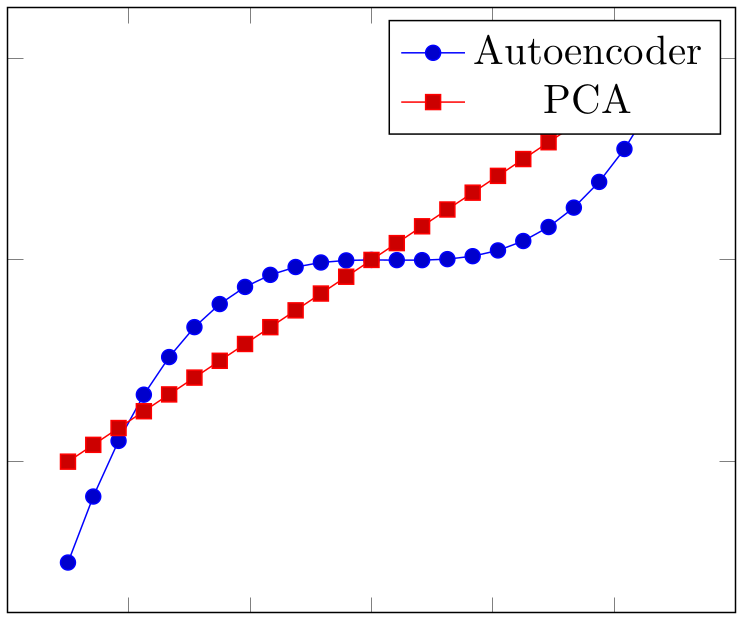

In [5]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(filename= "./img/ae2.png",width=300, height=300)

### The Problem Of Autoencoders

When we said that main idea behind autoencoders is to copy input to its output, the key idea is that not to copy without extracting useful informations about the distribution of the data. Autoencoders are allowed too much capacity, easy to be trained to the copying the task with learning anything useful about the dataset. So we need to penalize those autoencoders.

### Denoising Autoencoder
As we said, autoencoders are allowerd too much capacity. Regularized autoencoders can give us the task that find the latent features of input, instead of copying the input. There are lot of regularization methods to prevent copying task such as Sparse Autoencoders or Denoising Autoencoders.  We can achieve the task that learning useful informations about data by adding some noise to input data. 

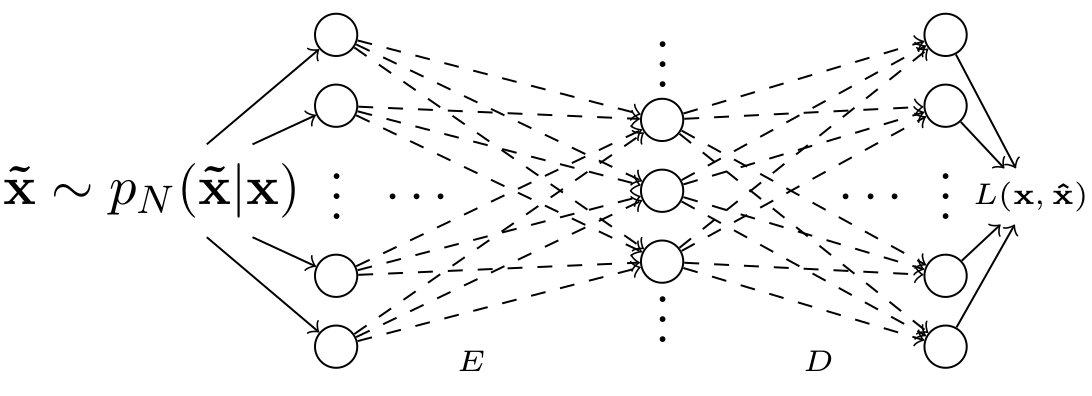

In [7]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(filename= "./img/ae3.png",width=600, height=600)

In other words, we can achive it by changing the reconstruction loss. We defined our minimization,

<font size="3">
$$\min\limits_{\theta} L = \nabla_\theta L(\mathbf{x}, D(E(\mathbf{x}))) =\nabla_\theta L(\mathbf{x}, \mathbf{\hat{x}}) $$
</font>


To perform the denoising, the input $\mathbf{x}$ is corrupted into $\mathbf{\tilde{x}}$ through stochastic mapping  of $\mathbf{\tilde{x}} \sim p_{N}(\mathbf{\tilde{x}}|\mathbf{x})$. Then the noisy (corrupted) input is used for encoding and decoding parts

<font size="3">
$$\mathbf{h} = E(\mathbf{\tilde{x}})$$

$$\mathbf{\hat{x}} = D(\mathbf{h}) = D(E(\mathbf{\tilde{x}})_{\mathbf{\tilde{x}} \sim p_{N}(\mathbf{\tilde{x}}|\mathbf{x})})$$
</font>

Then the minimization task is updated as 

<font size="3">
$$\min\limits_{\theta} L = \nabla_\theta L(\mathbf{x}, D(E(\mathbf{\tilde{x}})_{\mathbf{\tilde{x}} \sim p_{N}(\mathbf{\tilde{x}}|x)})) =\nabla_\theta L(\mathbf{x}, \mathbf{\hat{x}}) $$
</font>

The denoising can be seen as forcing our model to learn latent features of our input by adding noise to input then penalizing with reconstruction loss $L(\mathbf{x}, \mathbf{\hat{x}})$.

### Sparse Autoencoders

The sparsity simply comes from adding a shrinkage method to reconstruction loss like in machine learning tasks.

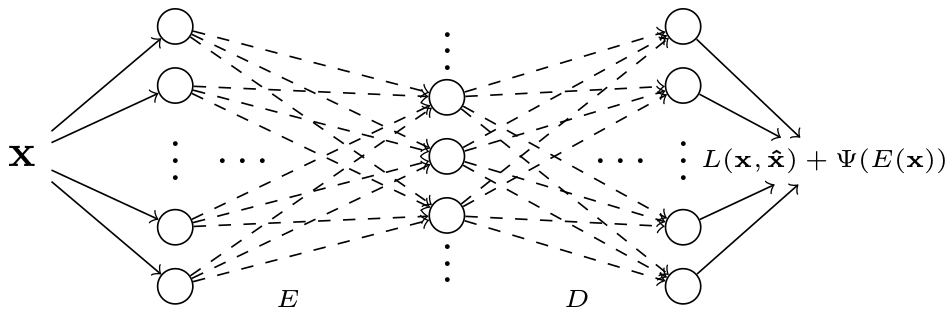

In [8]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(filename= "./img/ae4.png",width=600, height=600)

The minimization will be

<font size="3">
$$\min\limits_{\theta} L = \nabla_\theta L(\mathbf{x}, D(E(\mathbf{x}))) + \underbrace{\Psi(E(\mathbf{x}))}_{\text sparisty} =\nabla_\theta L(\mathbf{x}, \mathbf{\hat{x}}) $$
    </font>

This procedure can be interpreted as Bayesian inference with terms of posterior, likelihood and prior: $posterior \propto likelihood \times prior$. From this point maximizing the likelihood is equivalent to maximizing the posterior

<font size="3">
$$\max\limits_{\theta} p(\theta,\mathbf{x})=\max\limits_{\theta} p(\mathbf{x},\theta) \cdot p(\theta)$$
</font>

<font size="3">
$$=\max\limits_{\theta}\log p(\mathbf{x} | \theta) + \log p(\theta)$$ 
</font>

Now we can write our joint distribution in terms of prior of $\mathbf{h}$ and it's factor seeing $\mathbf{x}$ 

<font size="3">
$$p_{model}(\mathbf{x},\mathbf{h}) = p_{model}(\mathbf{x}|\mathbf{h}) \cdot p_{model}(\mathbf{h})$$
</font>

From this point, we can rewrite our likelihood and propose a prior distribution. 

<font size="3">
$$\log p_{model}(\mathbf{x},\mathbf{h}) = \log p_{model}(\mathbf{x}|\mathbf{h}) + \log p_{model}(\mathbf{h})$$
</font>

For simplicity, let us consider a zero-mean Laplacean prior

<font size="3">
$$ Lap(h_i|\mu=0,\lambda) = \frac{\lambda}{2}\exp(-\lambda|h_i - \mu|)$$

$$ = \frac{\lambda}{2}\exp(-\lambda|h_i |)$$
</font>

Then the posterior becomes

<font size="3">
$$\prod p_{model}(\mathbf{x}|h) \cdot \prod  p_{model}(h)$$
</font><br>

<font size="3">
$$= \sum \log p_{model}(\mathbf{x}|h) + \sum \log  p_{model}(h)$$
</font><br>

<font size="3">
$$ = \sum \log p_{model}(\mathbf{x}|h) - \lambda \sum |h|$$  
</font><br>

Other prior distributions like Student-t or Gaussian ($\text{L}_1$)  can make an impact for sparsity.

In [10]:
import torch.nn as nn
import torch
import torchvision
class AE(nn.Module):
    def __init__(self, **kwargs):
        super().__init__()
        self.encoder_hidden_layer = nn.Linear(
            in_features=kwargs["input_shape"], out_features=128
        )
        self.encoder_output_layer = nn.Linear(
            in_features=128, out_features=128
        )
        self.decoder_hidden_layer = nn.Linear(
            in_features=128, out_features=128
        )
        self.decoder_output_layer = nn.Linear(
            in_features=128, out_features=kwargs["input_shape"]
        )

    def forward(self, features):
        activation = self.encoder_hidden_layer(features)
        activation = torch.relu(activation)
        code = self.encoder_output_layer(activation)
        code = torch.relu(code)
        activation = self.decoder_hidden_layer(code)
        activation = torch.relu(activation)
        activation = self.decoder_output_layer(activation)
        reconstructed = torch.relu(activation)
        return reconstructed

In [11]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = AE(input_shape=784).to(device)
model = model.float()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
criterion = nn.MSELoss()

In [12]:
transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor()])

train_dataset = torchvision.datasets.MNIST(
    root="./data", train=True, transform=transform, download=True
)

test_dataset = torchvision.datasets.MNIST(
    root="./data", train=False, transform=transform, download=True
)

train_loader = torch.utils.data.DataLoader(
    train_dataset, batch_size=128, shuffle=True, num_workers=4, pin_memory=True
)

test_loader = torch.utils.data.DataLoader(
    test_dataset, batch_size=32, shuffle=False, num_workers=4
)

In [9]:
epochs = 10
for epoch in range(epochs):
    loss = 0
    for batch_features, _ in train_loader:
        # reshape mini-batch data to [N, 784] matrix
        # load it to the active device
        batch_features = batch_features.view(-1, 784).to(device)
        
        # reset the gradients back to zero
        # PyTorch accumulates gradients on subsequent backward passes
        optimizer.zero_grad()
        
        # compute reconstructions
        outputs = model(batch_features.float() + torch.rand(784).float().cuda())
        
        # compute training reconstruction loss
        train_loss = criterion(outputs, batch_features)
        
        # compute accumulated gradients
        train_loss.backward()
        
        # perform parameter update based on current gradients
        optimizer.step()
        
        # add the mini-batch training loss to epoch loss
        loss += train_loss.item()
    
    # compute the epoch training loss
    loss = loss / len(train_loader)
    
    # display the epoch training loss
    print("epoch : {}/{}, denoising reconstruction loss = {:.6f}".format(epoch + 1, epochs, loss))

epoch : 1/10, denoising reconstruction loss = 0.047253
epoch : 2/10, denoising reconstruction loss = 0.033344
epoch : 3/10, denoising reconstruction loss = 0.028931
epoch : 4/10, denoising reconstruction loss = 0.026686
epoch : 5/10, denoising reconstruction loss = 0.025358
epoch : 6/10, denoising reconstruction loss = 0.023968
epoch : 7/10, denoising reconstruction loss = 0.023052
epoch : 8/10, denoising reconstruction loss = 0.022500
epoch : 9/10, denoising reconstruction loss = 0.021645
epoch : 10/10, denoising reconstruction loss = 0.021485


In [13]:
epochs = 10
for epoch in range(epochs):
    loss = 0
    for batch_features, _ in train_loader:
        # reshape mini-batch data to [N, 784] matrix
        # load it to the active device
        batch_features = batch_features.view(-1, 784).to(device)
        
        # reset the gradients back to zero
        # PyTorch accumulates gradients on subsequent backward passes
        optimizer.zero_grad()
        
        # compute reconstructions
        outputs = model(batch_features.float())
        
        # compute training reconstruction loss
        train_loss = criterion(outputs, batch_features)
        
        # compute accumulated gradients
        train_loss.backward()
        
        # perform parameter update based on current gradients
        optimizer.step()
        
        # add the mini-batch training loss to epoch loss
        loss += train_loss.item()
    
    # compute the epoch training loss
    loss = loss / len(train_loader)
    
    # display the epoch training loss
    print("epoch : {}/{}, reconstruction loss = {:.6f}".format(epoch + 1, epochs, loss))

epoch : 1/10, reconstruction loss = 0.032681
epoch : 2/10, reconstruction loss = 0.018065
epoch : 3/10, reconstruction loss = 0.015945
epoch : 4/10, reconstruction loss = 0.014961
epoch : 5/10, reconstruction loss = 0.014348
epoch : 6/10, reconstruction loss = 0.013890
epoch : 7/10, reconstruction loss = 0.013515
epoch : 8/10, reconstruction loss = 0.013211
epoch : 9/10, reconstruction loss = 0.012961
epoch : 10/10, reconstruction loss = 0.012761


## Variational Autoencoders

As you can see, it is not possible to generate synthetic input data with vanilla Autoencoders (at least at this level of knowledge). A variational autoencoder (VAE) provides a probabilistic manner for describing an observation in latent space. Thus, rather than building an encoder which outputs a single value to describe each latent state attribute, we'll formulate our encoder to describe a probability distribution for each latent attribute. It is proposed in the paper [Auto-Encoding Variational Bayes](https://arxiv.org/pdf/1312.6114.pdf). 


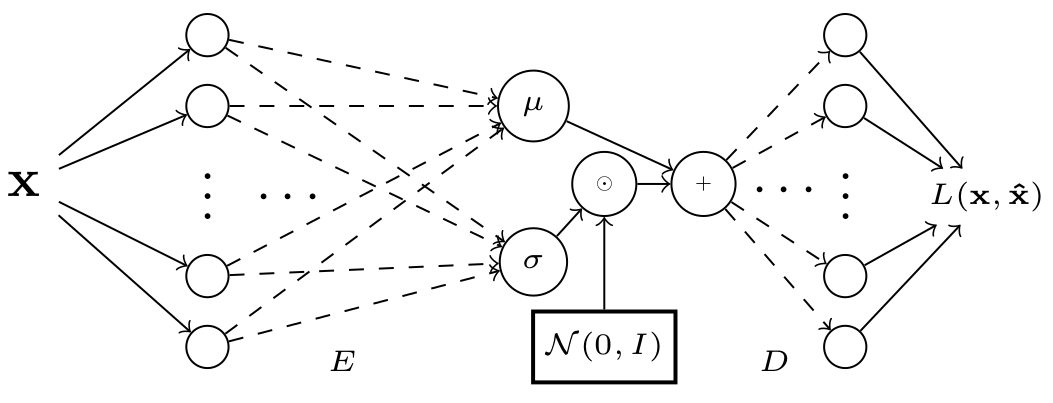

In [14]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(filename= "./img/ae5.png",width=600, height=600)

### Latent Variable Models

When training a generative model, the more complicated the dependencies between the dimensions, the more difficult the models are to train.  Take, for example, the problem of generating images of handwritten characters. Say for simplicity that we only care about modeling the digits 0-9. If the left half of the character contains the left half of a 5, then the right half cannot
contain the left half of a 0, or the character will very clearly not look like any real digit. Intuitively, it helps if the model first decides which character to generate before it assigns a value to any specific pixel. This kind of decision is formally called a latent *variable*. 

Before we can say that our model is representative of our dataset, we need to make sure that for every datapoint X in the dataset, there is one (or many) settings of the latent variables which causes the model to generate something very similar to $X$. Formally, say we have a vector of latent variables $z$ in a high-dimensional space $Z$ which we can easily sample according to some probability density function (PDF) $P(z)$ defined over $Z$. Then, say we have a family of deterministic functions $f(z;\theta)$ parameterized by a vector $\theta$ in some space $\Theta$, where $f: Z \times \Theta \rightarrow X$. $f$ is deterministic, but if $z$ is random and $\theta$ is fixed, then $f(z; \theta)$ is a random variable in the space $X$.

We wish to optimize $\theta$ such that we can sample $z$ from $P(z)$ and, with high probability, $f(z; \theta)$ will be like the $X$’s in our dataset.

To make this notion precise mathematically, we are aiming maximize the probability of each $X$ in the training set under the entire generative process, according to:

<font size="3">
$$P(X) = \int P(X | Z; \theta) P(Z) dz$$
</font>

Here, $f(z; \theta)$ has been replaced by a distribution $P(X|z; \theta)$, which allows us to make the dependence of $X$ on $z$ explicit by using the law of total probability.
In VAEs, the choice of this output distribution is often Gaussian: $P(X|z;\theta) = \mathcal{N}(X|f(z;\theta),\sigma^2I)$

### Auto-encoding variational Bayes

The mathematical basis of VAEs actually has relatively little to do with classical autoencoders. VAEs approximately maximize the above integral. To solve this equation, there are two problems that VAEs must deal with: how to define the latent variables $z$ (i.e., decide what information the  represent), and how to deal with the integral over $z$. VAEs give a definite answer to both.
First, how do we choose the latent variables $z$ such that we capture latent information? VAEs take an unusual approach to dealing with this problem: they assume that there is no simple interpretation of the dimensions of $z$, and instead assert that samples of $z$ can be drawn from a simple distribution: $\mathcal{N}(0,I)$.

Now all that remains is to maximizing this equation. As is common in machine learning, if we can find a computable formula for $P(X)$, and we can take the gradient of that formula, then we can optimize the model using stochastic gradient ascent. It is actually conceptually straightforward to compute $P(X)$ approximately.

The key idea behind the variational autoencoder is to attempt to sample values of $z$ that are likely to have produced $X$, and compute $P(X)$ just from those. 

This means that we need a new function $Q(z|X)$ which can take a value of $X$ and give us a distribution over $z$ values that are likely to produce $X$.

However, if $z$ is sampled from an arbitrary distribution with PDF $Q(z)$, which is not $\mathcal{N}(0,I)$, then how does that help us optimize $P(X)$? The relationship between $\mathbb{E}_{z \sim Q} P(X|z)$ and $P(X)$ is one of the cornerstones of variational Bayesian methods. We begin with the definition of Kullback-Leibler divergence between $P(z|X)$ and $Q(z)$ for some arbitrary $Q$. <br>

<font size="4">
    $$\text{KL}[Q(z) || P(z|X)] = \mathbb{E}_{z \sim Q}[\log Q(z) - \log P(z|X)].$$
</font><br>

We can get both $P(X)$ and $P(X|z)$ into this equation by applying Bayes rule to $P(z|X)$.

<font size="4">
    $$\text{KL}[Q(z) || P(z|X)] = \mathbb{E}_{z \sim Q}[\log Q(z) - \log P(X|z) - \log P(z)] + \log P(X)$$
</font><br>

Here, log $P(X)$ comes out of the expectation because it does not depend on $z$. Negating both sides, rearranging, and contracting part of $\mathbb{E}_{z \sim Q} $ into a
KL-divergence terms yields:

<font size="4">
    $$\log P(X) - \text{KL}[Q(z) || P(z|X)] = \mathbb{E}_{z \sim Q}[\log P(X|z)] - \text{KL}[Q(z) || P(z)]$$
</font><br>

Note that $X$ is fixed, and $Q$ can be any distribution, not just a distribution which does a good job mapping $X$ to the $z$’s that can produce $X$. Since we’re interested in inferring $P(X)$, it makes sense to construct a $Q$ which does depend on $X$, and in particular, one which makes $\text{KL}[Q(z) || P(z|X)]$ small:

<font size="4">
    $$\log P(X) - \text{KL}[Q(z|X) || P(z|X)] = \mathbb{E}_{z \sim Q}[\log P(X|z)] - \text{KL}[Q(z|X) || P(z)]$$
</font><br>

Tthe left-hand side has the quantity we want to maximize: $\log P(X)$ (plus an error term, which makes $Q$ produce $z$’s that can reproduce a given $X$; this term will become small if $Q$ is high-capacity). The right-hand side is something we can optimize via stochastic gradient descent given the right choice of $Q$. 

...since $Q$ is “encoding” $X$ into $z$, and $P$ is “decoding” it to reconstruct $X$.

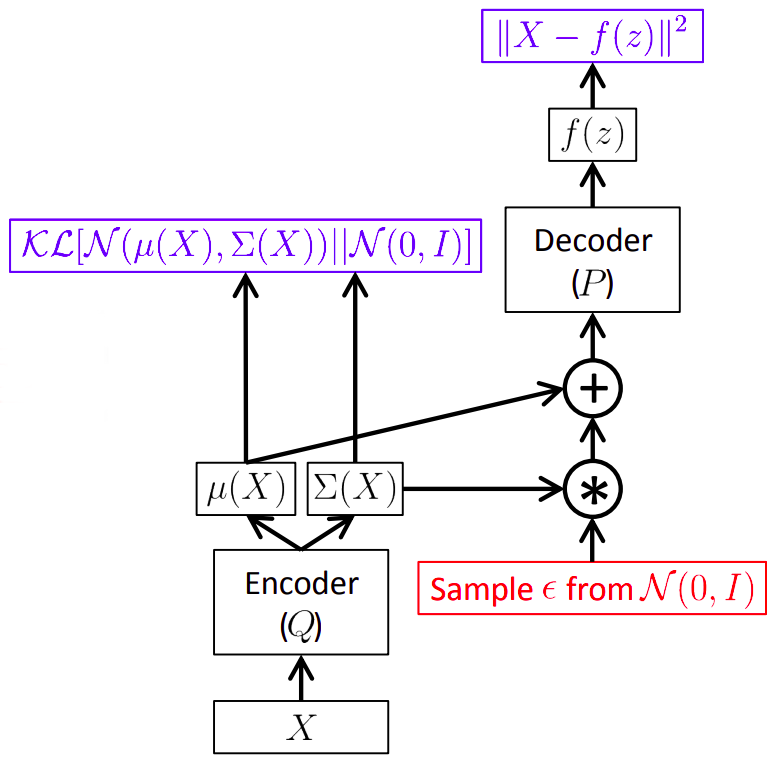

In [3]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(filename= "./img/vae2.png",width=400, height=400)

In [18]:
import torch
import torch.nn as nn
import torch
import torchvision
import argparse
import matplotlib
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
matplotlib.style.use('ggplot')
#!mkdir samples
#!mkdir generated

In [19]:
class LVAE(nn.Module):
    def __init__(self, in_features):
        super(LVAE, self).__init__()
        self.features = 16

        self.fc1 = nn.Linear(in_features,512)
        self.fc2 = nn.Linear(512,self.features*2)
        self.fc3 = nn.Linear(self.features,512)
        self.fc4 = nn.Linear(512,in_features)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
        
    def reparameterize(self, mu, log_var):
        std = torch.exp(0.5*log_var)
        eps = torch.randn_like(std)
        sample = mu + (eps * std)
        return sample
    
    def forward(self,x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = x.view(-1, 2, self.features)

        mu = x[:,0,:]
        log_var = x[:,1,:]

        z = self.reparameterize(mu, log_var)
        x = self.fc3(z)
        x = self.relu(x)
        x = self.fc4(x)
        x = self.sigmoid(x)
        return x, mu, log_var
    
    def decode(self,z):
        z = self.fc3(z)
        z = self.relu(z)
        z = self.fc4(z)
        z = self.sigmoid(z)
        return z

def floss(loss, mu, log_var):
    LOSS = loss
    KLD  = -0.5 * torch.sum(1 + log_var - mu.pow(2) - log_var.exp())
    return LOSS + KLD

In [20]:
EPOCHS = 20
BATCH_SIZE = 64
LEARNING_RATE = 0.0001
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
transform = torchvision.transforms.Compose([
        torchvision.transforms.ToTensor(),
])
train = torchvision.datasets.MNIST(
    root = './data',
    train = True,
    download = True,
    transform=transform
)

val = torchvision.datasets.MNIST(
    root = './data',
    train = False,
    download = True,
    transform=transform
)
train_loader = torch.utils.data.DataLoader(
        train,
        batch_size=BATCH_SIZE,
        shuffle=True)

val_loader = torch.utils.data.DataLoader(
    train,
    batch_size=BATCH_SIZE,
    shuffle=True)

In [21]:
model = LVAE(28*28)
model = model.to(DEVICE)
optimizer = torch.optim.Adam(model.parameters(),lr = LEARNING_RATE)
criterion = nn.BCELoss(reduction='sum')

In [22]:
training_loss = []
validation_loss = []
for epoch in range(EPOCHS):
    model.train()
    total_loss = 0.0
    for i, data in tqdm(enumerate(train_loader), total=int(len(train)//train_loader.batch_size)):
        inputs, _ = data
        inputs = inputs.to(DEVICE)
        inputs = inputs.view(inputs.size(0),-1)
        optimizer.zero_grad()

        out, mu, log_var = model.forward(inputs)
        reconstruction_loss = criterion(out,inputs)
        loss = floss(reconstruction_loss,mu,log_var)
        total_loss += loss.item()
        loss.backward()
        optimizer.step()

        if i % 100 == 0:
            num_rows = 8
            both = torch.cat((inputs.view(BATCH_SIZE,1,28,28)[:8],
                               out.view(BATCH_SIZE,1,28,28)[:8]
             ))
            torchvision.utils.save_image(both.cpu(),f'./samples/{epoch}_{i}.png',nrow=num_rows)

            z = np.random.normal(0,1,(64,16))
            z = torch.from_numpy(z).to(DEVICE)
            z = z.float()
            new = model.decode(z)
            new = new.view(BATCH_SIZE,1,28,28)[:8]
            torchvision.utils.save_image(new.cpu(),f'./generated/{epoch}_{i}.png',nrow=4)

    train_loss = total_loss/(len(train_loader.dataset))

    model.eval()
    total_loss = 0.0
    with torch.no_grad():
        for i, data in tqdm(enumerate(val_loader), total = int(len(val)/val_loader.batch_size)):
            inputs, _ = data
            inputs = inputs.to(DEVICE)
            inputs = inputs.view(inputs.size(0), -1)

            out, mu, log_var = model.forward(inputs)
            reconstruction_loss = criterion(out,inputs)
            loss = floss(reconstruction_loss, mu, log_var)
            total_loss += loss.item()

    val_loss = total_loss/(len(val_loader.dataset))

    training_loss.append(train_loss)
    validation_loss.append(val_loss)
    print(f"Train Loss: {train_loss}")
    print(f"Val Loss: {val_loss}")

938it [00:07, 129.69it/s]                         
938it [00:04, 232.21it/s]                         
  2%|▏         | 16/937 [00:00<00:05, 155.75it/s]

Train Loss: 215.5734670328776
Val Loss: 164.136857421875


938it [00:05, 173.55it/s]                         
938it [00:04, 220.21it/s]                         
  2%|▏         | 16/937 [00:00<00:06, 152.59it/s]

Train Loss: 150.9492413248698
Val Loss: 140.6877974283854


938it [00:05, 161.20it/s]                         
938it [00:04, 228.87it/s]                         
  2%|▏         | 15/937 [00:00<00:06, 149.67it/s]

Train Loss: 134.72044739583333
Val Loss: 130.0392603922526


938it [00:05, 166.76it/s]                         
938it [00:03, 236.96it/s]                         
  2%|▏         | 17/937 [00:00<00:05, 165.28it/s]

Train Loss: 127.11982541503906
Val Loss: 124.41747920735678


938it [00:05, 172.71it/s]                         
938it [00:03, 234.86it/s]                         
  2%|▏         | 17/937 [00:00<00:05, 164.00it/s]

Train Loss: 122.71569195963542
Val Loss: 121.13976298014323


938it [00:05, 170.46it/s]                         
938it [00:04, 224.51it/s]                         
  2%|▏         | 16/937 [00:00<00:05, 157.65it/s]

Train Loss: 119.90917020263672
Val Loss: 118.7488402750651


938it [00:05, 169.28it/s]                         
938it [00:04, 227.54it/s]                         
  2%|▏         | 16/937 [00:00<00:05, 158.76it/s]

Train Loss: 117.89604793294271
Val Loss: 116.98038532307943


938it [00:05, 172.62it/s]                         
938it [00:04, 226.80it/s]                         
  2%|▏         | 17/937 [00:00<00:05, 162.99it/s]

Train Loss: 116.34752657877604
Val Loss: 115.56754181315104


938it [00:05, 170.55it/s]                         
938it [00:04, 231.98it/s]                         
  2%|▏         | 16/937 [00:00<00:05, 158.59it/s]

Train Loss: 115.06859660644531
Val Loss: 114.31358195800782


938it [00:05, 172.58it/s]                         
938it [00:03, 237.44it/s]                         
  2%|▏         | 17/937 [00:00<00:05, 162.59it/s]

Train Loss: 114.00426014811198
Val Loss: 113.38540196126301


938it [00:05, 175.96it/s]                         
938it [00:03, 237.30it/s]                         
  2%|▏         | 17/937 [00:00<00:05, 161.55it/s]

Train Loss: 113.11955670572917
Val Loss: 112.58359528808593


938it [00:05, 178.34it/s]                         
938it [00:03, 239.74it/s]                         
  2%|▏         | 17/937 [00:00<00:05, 163.22it/s]

Train Loss: 112.31784666748047
Val Loss: 111.91152829182943


938it [00:05, 173.68it/s]                         
938it [00:04, 234.24it/s]                         
  2%|▏         | 17/937 [00:00<00:05, 162.76it/s]

Train Loss: 111.68607283121744
Val Loss: 111.30409091796875


938it [00:05, 173.92it/s]                         
938it [00:03, 238.98it/s]                         
  2%|▏         | 17/937 [00:00<00:05, 168.67it/s]

Train Loss: 111.05693250325521
Val Loss: 110.71840769042969


938it [00:05, 173.60it/s]                         
938it [00:03, 236.71it/s]                         
  2%|▏         | 17/937 [00:00<00:05, 163.52it/s]

Train Loss: 110.58686532389324
Val Loss: 110.24047206217448


938it [00:05, 173.13it/s]                         
938it [00:03, 234.97it/s]                         
  2%|▏         | 17/937 [00:00<00:05, 162.29it/s]

Train Loss: 110.12997282714844
Val Loss: 109.86881016031901


938it [00:05, 167.11it/s]                         
938it [00:04, 225.54it/s]                         
  2%|▏         | 17/937 [00:00<00:05, 163.39it/s]

Train Loss: 109.67967903238932
Val Loss: 109.43023762207031


938it [00:05, 165.91it/s]                         
938it [00:04, 224.55it/s]                         
  2%|▏         | 16/937 [00:00<00:06, 151.54it/s]

Train Loss: 109.29342767740886
Val Loss: 109.0211111328125


938it [00:05, 167.05it/s]                         
938it [00:04, 230.94it/s]                         
  2%|▏         | 17/937 [00:00<00:05, 159.15it/s]

Train Loss: 108.96267189127605
Val Loss: 108.72176418863933


938it [00:05, 170.57it/s]                         
938it [00:04, 230.00it/s]                         

Train Loss: 108.64832112630208
Val Loss: 108.42778349202474


# Generative Adversarial Networks
**Author: Oğuzhan Ercan**

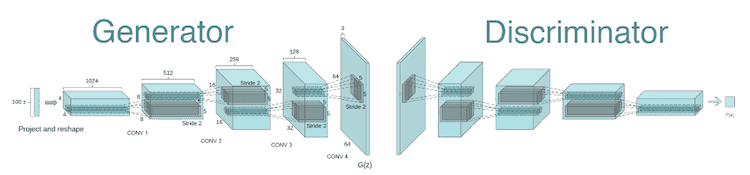

In [2]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(filename= "./img/gan1.png",width=1000, height=1000)

Generative Adversarial Networks,for short GANs are an unsupervised (some sources call semi-supervised) architecture that provides shytetic data like a photo that looks like a human face but human does not exist. Like all other machine learning models it learns from data. We will dive into 3 main concepts of GANs; discriminator, generator and loss function.

## Discriminator

from IPython.display import Image
from IPython.core.display import HTML 
Image(filename= "./img/gan2.png",width=1000, height=1000)

The biggest area of machine learning is classification. There are many traditional machine learning algorithm for classification like KNN, SVM, Logistic Regression etc. and also deep learning models work for that. Actually, GANs are deep learning architectures, that consist of two different models, and one of them is called the discriminator that classifies inputs as real or fake. The discriminator model that learns to determine whether a sample is from the model distribution (generator, we will be talking about it next part) or the data distribution.

## Generator

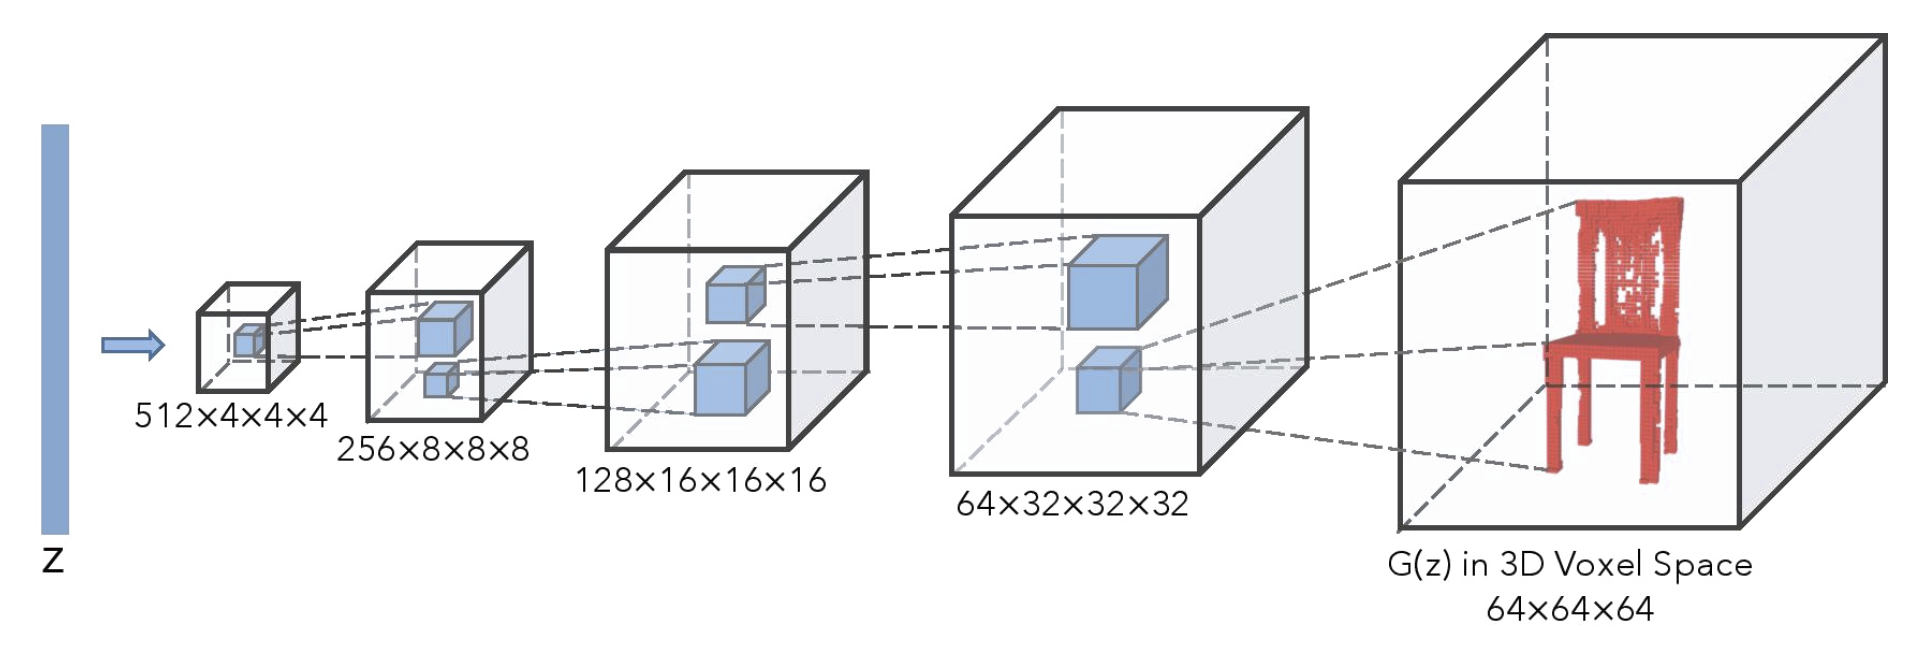

In [4]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(filename= "./img/gan3.png",width=1000, height=1000)

The generator tries to catch the distrubiton of dataset to provide shytetic data. It takes random vector called as noise vector, mostly gaussian distrubiton,mean equals zero and standart deviation equals one. Then model the generator upsamples the vector to wanted shape of the data will be provided.

## The Loss Function

<font size="5">
$$\min_G \max_D V(D,G) = \mathbb{E}_{\mathbf{x} \sim p_{\text{data}}(x)}[\log D(\mathbf{x})] + \mathbb{E}_{z \sim p_{z}(z)}[\log (1-D(G(z)))]$$
</font>

Most important concepts of machine learning is the loss function we want to minimize. Neural network architectures provide a function that maps our data ($x$) to the result ($y$).First, vector $X$ have weights that randomly initilized, after epochs of forward and backward propagation weights are getting right values to minimize loss function. Why loss function is so important ? To reduce loss value model need to know what is wrong with parameters. We will be using Binary Cross Entropy Loss for this architecture. BCE Loss represents the error of discriminator on real data and generator on noise vector at the same time. First component of formula $\log D(x)$, discriminator works on real daha, that means discriminator must predict 1 (label of real = 1, label of fake = 0). $\log D(1) = 0$, error equals 0. Second component of formula $\log (1-D(G(z)))$, generator works on noise vector then discriminator tries to predict it is real or fake. If the output of generator classifies by discriminator as real, that means generator works well. For short, the model tries to maximize $D(x)$ and minimize $D(G(z))$.



## All in one with counterfeiter - Police Metaphor

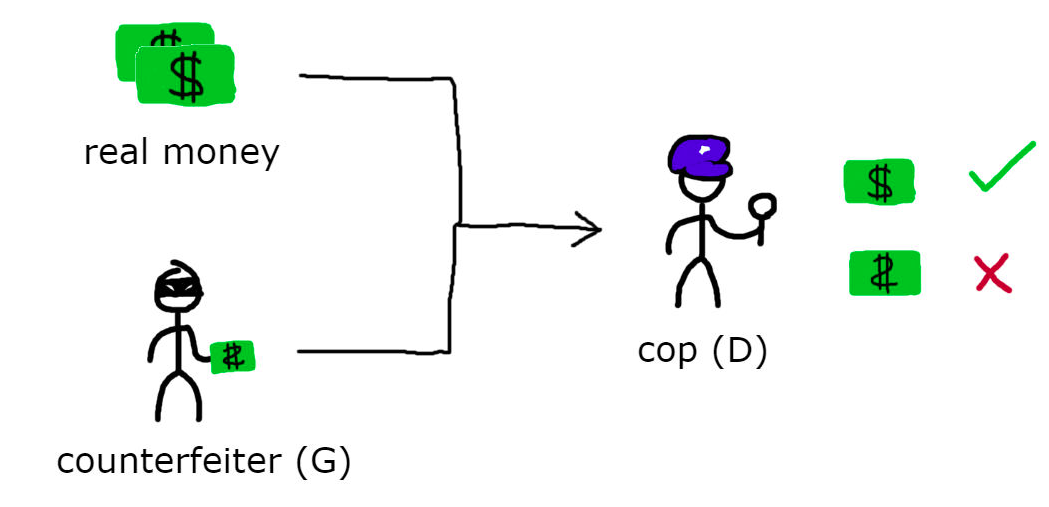

In [6]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(filename= "./img/gan4.png",width=1000, height=1000)

* Counterfeiter : Generator
* Police : Discriminator 

Counterfeiter tries to produce fake money and police tries to find out if it is real or fake. At the beginning counterfeiter produces money but police eaisly detects it is fake. After a few tries, counterfeiter is able to generate more realistic money but at the same the police can better distinguish between real money and fake money. That is Generative Adversarial Networks.

In [7]:
%matplotlib inline
import numpy as np
import torch 
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets
import torchvision.transforms as transforms
import pickle as pkl


In [8]:
#Numworkers are the number of batches we will move to the GPU while
#model propagates forward and backward.
num_workers = 1 #For my GPU, 1 is the fastest.
batch_size = 64

#At the related paper Goodfellow's GANs, there is no transform for dataset.
transform = transforms.ToTensor()

#Downlaod the data
train_data = datasets.MNIST(root='./data', train=True,
                                   download=True, transform=transform)

# prepare data loader
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,
                                           num_workers=num_workers,shuffle = True)

In [9]:
class Discriminator(nn.Module):

    def __init__(self, input_size, hidden_dim, output_size):
        super(Discriminator, self).__init__()
        
        # Defining hidden layers
        self.fc1 = nn.Linear(input_size, hidden_dim*4)#input size = 28*28
        self.fc2 = nn.Linear(hidden_dim*4, hidden_dim*2)
        self.fc3 = nn.Linear(hidden_dim*2, hidden_dim)
        
        # Output layer, it will return a probability,
        #so output_size must be 1
        self.fc4 = nn.Linear(hidden_dim, output_size)
        
        # dropout layer. It is important about stabilization of model. 
        self.dropout = nn.Dropout(0.35)
        
        
    def forward(self, x):
        # Flatten
        x = x.view(-1, 28*28)
        # all hidden layers
        x = F.leaky_relu(self.fc1(x), 0.2) # (input, slope)
        x = self.dropout(x)
        x = F.leaky_relu(self.fc2(x), 0.2)
        x = self.dropout(x)
        x = F.leaky_relu(self.fc3(x), 0.2)
        x = self.dropout(x)
        x = self.fc4(x)

        return x

In [10]:
class Generator(nn.Module):

    def __init__(self, input_size, hidden_dim, output_size):
        super(Generator, self).__init__()
        
        # Defining hidden layers
        self.fc1 = nn.Linear(input_size, hidden_dim)# Input size equals noise vector size.
        #We will define it as 100 like Goodfellow
        self.fc2 = nn.Linear(hidden_dim, hidden_dim*2)
        self.fc3 = nn.Linear(hidden_dim*2, hidden_dim*4)
        
        # Output size of generator must be equal to input size of discriminator.
        self.fc4 = nn.Linear(hidden_dim*4, output_size)
        
        # dropout layer. It is important to prevent mode collapse
        self.dropout = nn.Dropout(0.35)

    def forward(self, x):
        
        x = F.leaky_relu(self.fc1(x), 0.2) # (input, slope)
        x = self.dropout(x)
        x = F.leaky_relu(self.fc2(x), 0.2)
        x = self.dropout(x)
        x = F.leaky_relu(self.fc3(x), 0.2)
        x = self.dropout(x)
        # At the paper, tanh has been used.
        x = torch.tanh(self.fc4(x))

        return x

In [11]:
# Discriminator hyperparams

input_size = 784 # 28*28

d_output_size = 1 # Probability, so it is 1

d_hidden_size = 32 # To control the number of perceptron of hidden layers eaisly

# Generator hyperparams


z_size = 100 # Shape of noise vektor

g_output_size = 784 # It must be equal to input size of discriminator
g_hidden_size = 32 # To control the number of perceptron of hidden layers eaisly

In [12]:
D = Discriminator(input_size, d_hidden_size, d_output_size)
G = Generator(z_size, g_hidden_size, g_output_size)


print(D)
print(G)

Discriminator(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=32, bias=True)
  (fc4): Linear(in_features=32, out_features=1, bias=True)
  (dropout): Dropout(p=0.35)
)
Generator(
  (fc1): Linear(in_features=100, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=128, bias=True)
  (fc4): Linear(in_features=128, out_features=784, bias=True)
  (dropout): Dropout(p=0.35)
)


In [13]:
def real_loss(D_out, smooth=False):
    batch_size = D_out.size(0)
    # label smoothing
    if smooth:
        # In order to prevent the discriminitor from being too developed and the generator from lagging behind
        labels = (torch.ones(batch_size)*0.9)
    else:
        labels = torch.ones(batch_size) # real labels = 1
        
    criterion = nn.BCEWithLogitsLoss()
    # calculate loss
    loss = criterion(D_out.squeeze(), labels)
    return loss

def fake_loss(D_out):
    batch_size = D_out.size(0)
    labels = torch.zeros(batch_size) # fake labels = 0
    criterion = nn.BCEWithLogitsLoss()
    # calculate loss
    loss = criterion(D_out.squeeze(), labels)
    return loss

In [14]:
lr = 0.002 #According to related paper.

#2 optimizer for 2 different models
d_optimizer = optim.Adam(D.parameters(), lr)
g_optimizer = optim.Adam(G.parameters(), lr)

In [ ]:
# number of epochs
!mkdir gan
num_epochs = 50

samples = [] # To storage generated data
losses = [] # To storage loss values

print_every = 400 #


sample_size=16 #number of images that will be generated
fixed_z = np.random.uniform(-1, 1, size=(sample_size, z_size)) # random noise
fixed_z = torch.from_numpy(fixed_z).float()

D.train()
G.train()
for epoch in range(num_epochs):
    
    for batch_i, (real_images, _) in enumerate(train_loader):
                
        batch_size = real_images.size(0)
        
        # Rescaling yapmamız gerek
        real_images = (real_images*2 - 1) #[0,1) to [-1, 1)
        
       
        #  TRAINING model DISCRIMINATOR
        
        
        d_optimizer.zero_grad()
        
        # 1 : Train with real images

        D_real = D(real_images)
        d_real_loss = real_loss(D_real, smooth=True)
        
        # 2 : Train with fake images
        
        # Generating fake images
        z = np.random.uniform(-1, 1, size=(batch_size, z_size))
        z = torch.from_numpy(z).float()
        fake_images = G(z)
        
            
        D_fake = D(fake_images)
        d_fake_loss = fake_loss(D_fake)
        
        # Sum loss and backward prop
        d_loss = d_real_loss + d_fake_loss
        d_loss.backward()
        d_optimizer.step()
        
        
       
        # TRAINING model GENERATOR
        
        g_optimizer.zero_grad()
        
        
        
        # Generate fake images
        z = np.random.uniform(-1, 1, size=(batch_size, z_size))
        z = torch.from_numpy(z).float()
        fake_images = G(z)
        
        
        D_fake = D(fake_images)
        g_loss = real_loss(D_fake) # use real loss to flip labels
        
        # backprop
        g_loss.backward()
        g_optimizer.step()

        # Print Loss
        if batch_i % print_every == 0:
            # print discriminator and generator loss
            print('Epoch [{:5d}/{:5d}] | d_loss: {:6.4f} | g_loss: {:6.4f}'.format(
                    epoch+1, num_epochs, d_loss.item(), g_loss.item()))

    
    #Save losses
    losses.append((d_loss.item(), g_loss.item()))
    
    # Generate and save images
    G.eval() # Eval Mode
    samples_z = G(fixed_z)
    samples.append(samples_z)
    G.train() # Train mode


# Save images to local
with open('./gan/train_samples.pkl', 'wb') as f:
    pkl.dump(samples, f)

Epoch [    1/   50] | d_loss: 1.4040 | g_loss: 0.6056
Epoch [    1/   50] | d_loss: 1.0208 | g_loss: 1.8448
Epoch [    1/   50] | d_loss: 1.0195 | g_loss: 2.9489
Epoch [    2/   50] | d_loss: 0.9497 | g_loss: 3.6571
Epoch [    2/   50] | d_loss: 1.3142 | g_loss: 1.1418
Epoch [    2/   50] | d_loss: 1.1678 | g_loss: 1.5499
Epoch [    3/   50] | d_loss: 1.0430 | g_loss: 1.3262
Epoch [    3/   50] | d_loss: 0.9139 | g_loss: 2.6505
Epoch [    3/   50] | d_loss: 0.8534 | g_loss: 2.6941
Epoch [    4/   50] | d_loss: 1.1313 | g_loss: 1.2205
Epoch [    4/   50] | d_loss: 1.2187 | g_loss: 1.9902
Epoch [    4/   50] | d_loss: 1.0783 | g_loss: 1.2662
Epoch [    5/   50] | d_loss: 1.1152 | g_loss: 1.2627
Epoch [    5/   50] | d_loss: 1.0135 | g_loss: 2.2571
Epoch [    5/   50] | d_loss: 1.3855 | g_loss: 1.0634
Epoch [    6/   50] | d_loss: 1.2805 | g_loss: 1.4355
Epoch [    6/   50] | d_loss: 1.3125 | g_loss: 1.0359
Epoch [    6/   50] | d_loss: 1.2340 | g_loss: 1.6848
Epoch [    7/   50] | d_loss